In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:>

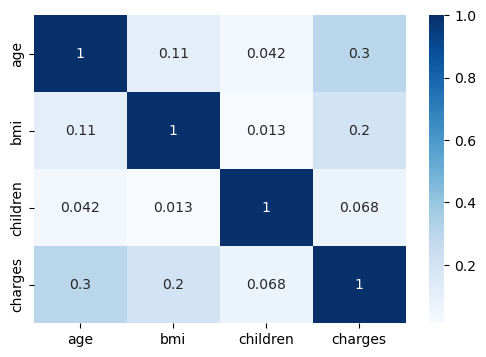

In [10]:
plt.figure(figsize=(6,4))
sb.heatmap(df.corr(),cmap='Blues',annot=True)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

Converting categorical data into numeric for analysis

In [17]:
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])

In [18]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


<AxesSubplot:>

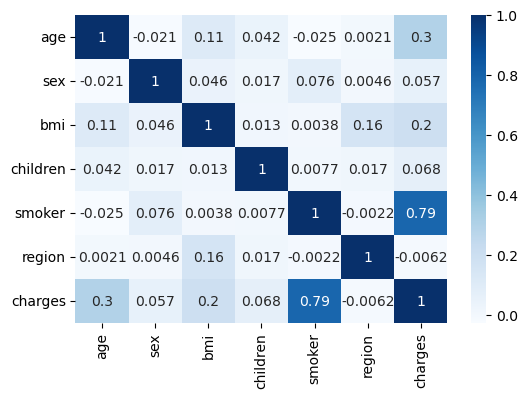

In [20]:
plt.figure(figsize=(6,4))
sb.heatmap(df.corr(),cmap='Blues',annot=True)

Smoker is highly positive correlated with charges

<AxesSubplot:>

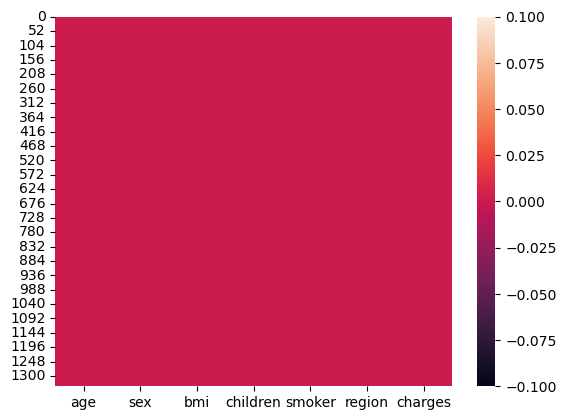

In [22]:
sb.heatmap(df.isnull())

<AxesSubplot:ylabel='Frequency'>

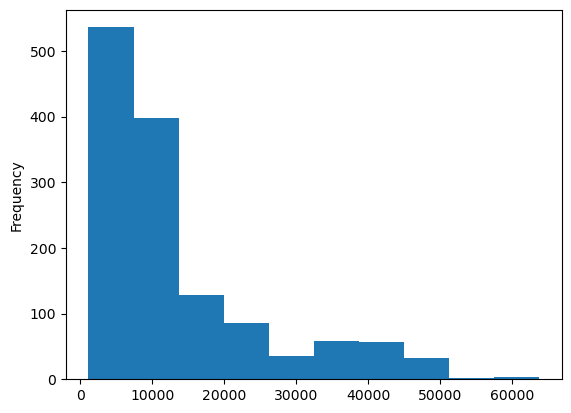

In [24]:
df['charges'].plot.hist()

most of medical charges are ranging between 10000 to 20000.

<AxesSubplot:ylabel='Frequency'>

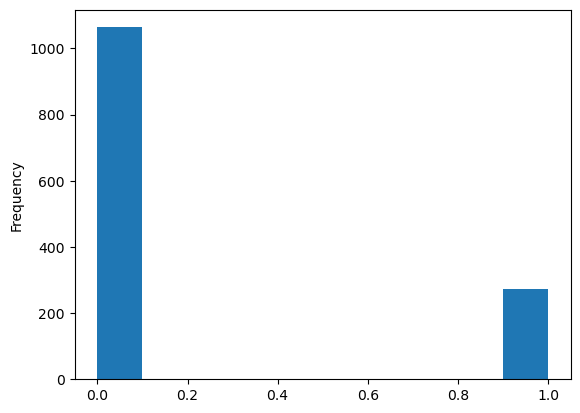

In [25]:
df['smoker'].plot.hist()

in this data almost 25% of people are smoking

<AxesSubplot:ylabel='Frequency'>

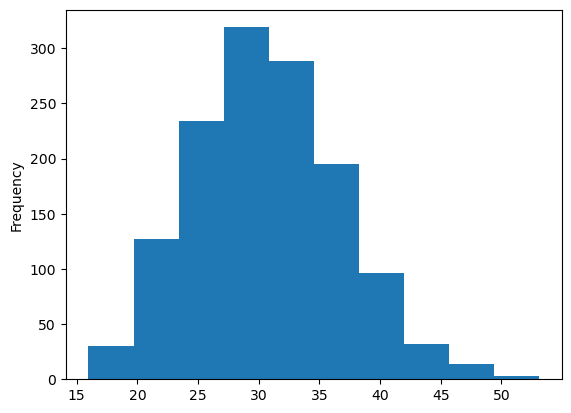

In [26]:
df['bmi'].plot.hist()

most of BMI are ranging between 20 to 40

<AxesSubplot:ylabel='Frequency'>

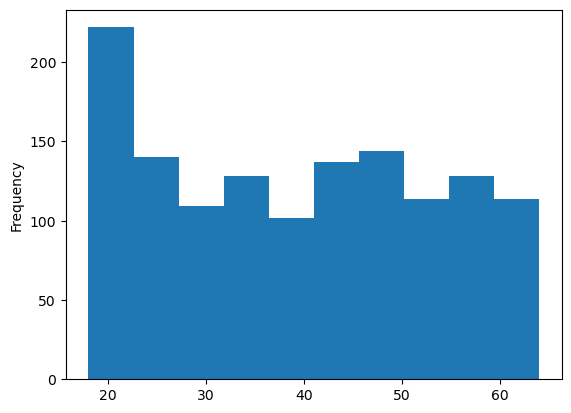

In [27]:
df['age'].plot.hist()

age            AxesSubplot(0.125,0.53;0.110714x0.35)
sex         AxesSubplot(0.257857,0.53;0.110714x0.35)
bmi         AxesSubplot(0.390714,0.53;0.110714x0.35)
children    AxesSubplot(0.523571,0.53;0.110714x0.35)
smoker      AxesSubplot(0.656429,0.53;0.110714x0.35)
region      AxesSubplot(0.789286,0.53;0.110714x0.35)
charges        AxesSubplot(0.125,0.11;0.110714x0.35)
dtype: object

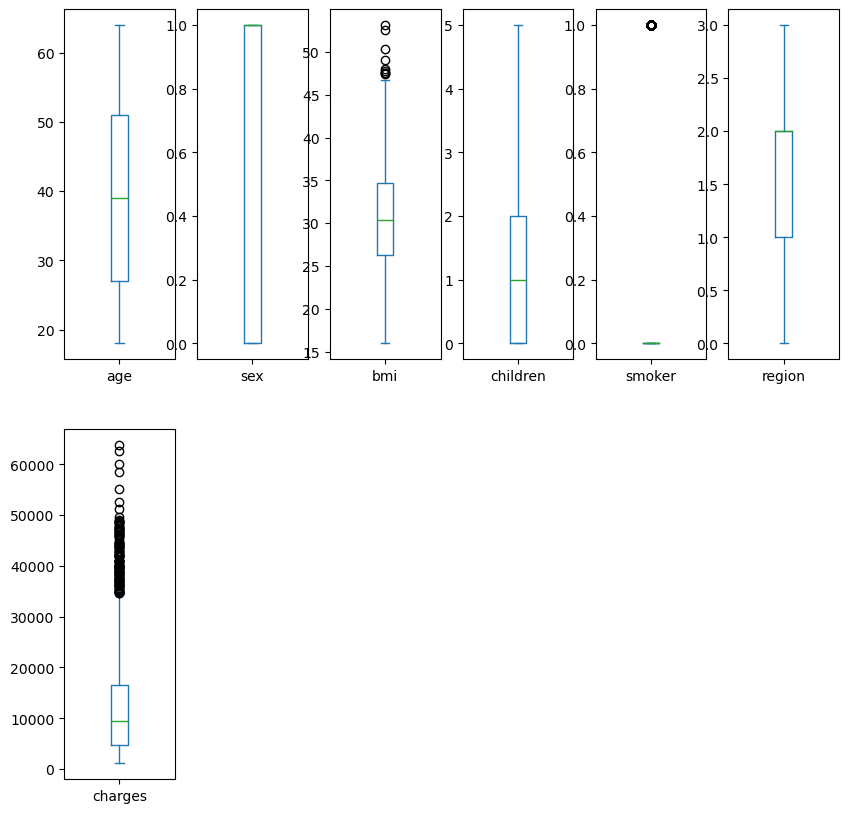

In [29]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

<AxesSubplot:xlabel='charges', ylabel='age'>

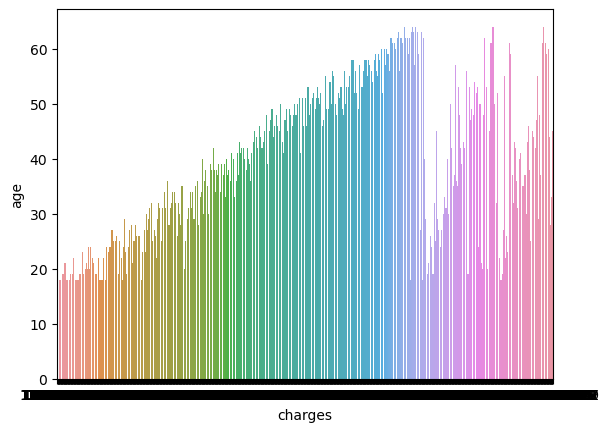

In [100]:
sb.barplot(df['charges'],df['age'])

as age increse charges of medical insurance is also incresing

In [31]:
y=df.iloc[:,-1]

In [32]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [41]:
x=df.iloc[:,0:6]

In [42]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [49]:
lm=LinearRegression()

In [51]:
lm.fit(x_train,y_train)

LinearRegression()

In [53]:
lm.score(x_train,y_train)

0.7441936495109288

In [54]:
lm.coef_

array([  255.34233146,   -32.19017907,   342.99122472,   411.52423632,
       23658.06227691,  -299.81551675])

In [56]:
pred=lm.predict(x_test)

In [60]:
print('Predicted charges and actual charges',pred,y_test)

Predicted charges and actual charges [ 8903.48992578  7144.33743701 36876.70750532  9433.85579582
 27081.073227   10831.0827722    229.36866068 16966.21834573
  1035.13601142 11209.991947   27945.48653862  9407.41238597
  5321.16360973 38487.47184244 40337.21432258 37161.68986129
 15329.28960682 35990.04607494  9133.77675848 31514.51854466
  3662.26546468 10007.87837706  2302.033255    7225.5294472
 11302.01945945 12952.6715778  14415.31778012  6211.16582822
  9902.93708393  2257.32872187  8965.21899282 13125.6255583
  4677.89438824  3392.93452429  4363.75732165 13066.21289171
  1884.46743444  8702.46801308 33279.18294002 32658.61279846
  3774.46041117  4405.05718269 14045.5665479  11420.98089681
  8834.69293708 11932.57619804  5375.44925898  3008.60366101
 35533.16083435  9229.50510741 15892.74976092  2404.74971515
 12487.33096097  1479.84998813 13431.7696714  12526.65554744
  4315.86880122 32226.94223853 13218.65066776 12892.83424443
 14049.47373293 10628.70144795 16216.03386618  777

In [61]:
lm.score(x_test,y_test)

0.7717585709071125

In [62]:
from sklearn.linear_model import Lasso,Ridge


In [63]:
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))

0.744193649510928


In [82]:
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [68]:
svr=SVR ()
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y=svr.predict(x_test)
pred_y
print('Mean Squared error :',np.sqrt(mean_squared_error(y_test,pred_y)))

svr=SVR (kernel='poly')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y=svr.predict(x_test)
pred_y
print('Mean Squared error :',np.sqrt(mean_squared_error(y_test,pred_y)))

svr=SVR (kernel='rbf')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y=svr.predict(x_test)
pred_y
print('Mean Squared error :',np.sqrt(mean_squared_error(y_test,pred_y)))

-0.0973552631023793
Mean Squared error : 12852.691146952027
-0.08580077378425965
Mean Squared error : 12735.537968724911
-0.0973552631023793
Mean Squared error : 12852.691146952027


In [103]:
import pickle

filename="Medical_incurance_cost"
pickle.dump(lm,open(filename,'wb'))